## Análisis Descriptivo: ¿Quién llegará al número uno en Billboard 100?

In [ ]:
# np generación de formulas y procesamiento
import numpy as np
# pd para manipulación de datos
import pandas as pd
# sns y plt para graficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
# Cargadar desde el drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
pwd

'/content'

## Cargamos los datos de entrada

In [ ]:
# carga de Datos
artists_billboard=pd.read_csv('artists_billboard_fix3.csv',sep = ",",encoding = 'latin1')

In [ ]:
# Visaulizar dimensionalidad
artists_billboard.shape

(635, 11)

In [ ]:
# Visualizar los primeros registros del dataset
# df.head(#) #: numero de filas que desee visualizar
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


In [ ]:
# Visualizar la cantidad y el tipo de dato de cada variable (columna)
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   durationSeg     635 non-null    float64
 9   top             635 non-null    int64  
 10  anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


## ¿Cuántos alcanzaron el número 1?

In [ ]:
# Agrupar por los que ganaron y ver la caantidad
# Calcular la distribución de la variable target
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

<Axes: xlabel='top', ylabel='count'>

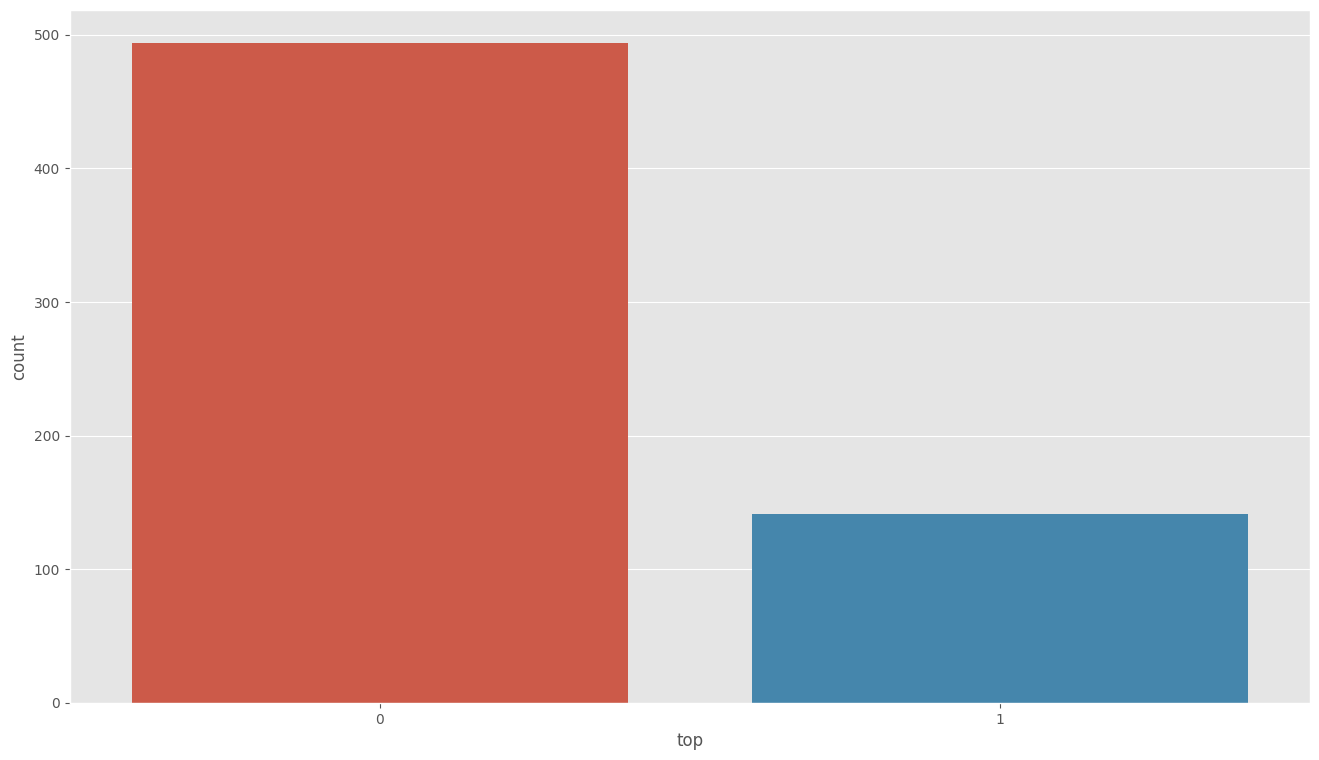

In [ ]:
# Visualizar la distribución de la variable target
#sns.factorplot('top',data=artists_billboard,kind="count")
sns.countplot(data = artists_billboard, x = "top")

In [ ]:
# Principales  medidas estadisticas para las variables cuantitativas
artists_billboard.describe()


,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


In [ ]:
std_Ds = artists_billboard['durationSeg'].std()
mean_Ds = artists_billboard['durationSeg'].mean()

cv_Ds = (std_Ds / mean_Ds) * 100
print('El coeficiente de variación de la duración de las canciones es: ', cv_Ds)

El coeficiente de variación de la duración de las canciones es:  196.95954681616044


In [ ]:
agpTop = artists_billboard.groupby('top')

nvgC = agpTop.agg(
    prom = ('durationSeg','mean'),
    std = ('durationSeg','std')
)

nvgC['coef_var'] = (nvgC['std'] / nvgC['prom']) * 100
nvgC.head()

,prom,std,coef_var
top,,,
0,338.368421,691.129573,204.253568
1,263.609929,363.934252,138.057869


In [ ]:
# quantile(np.arange(Per Inicial, Per Final, # frecuencia de analisis))
artists_billboard['durationSeg'].quantile(np.arange(0,1,0.1))

0.0      0.0
0.1    133.8
0.2    190.0
0.3    206.2
0.4    220.0
0.5    232.0
0.6    241.0
0.7    255.8
0.8    277.0
0.9    321.6
Name: durationSeg, dtype: float64

In [ ]:
artists_billboard['durationSeg'].quantile(np.arange(0.9,1,0.01))

0.90     321.60
0.91     328.88
0.92     340.84
0.93     355.10
0.94     367.96
0.95     401.40
0.96     564.04
0.97     878.86
0.98    2216.32
0.99    3977.18
Name: durationSeg, dtype: float64

<Axes: xlabel='artist_type', ylabel='durationSeg'>

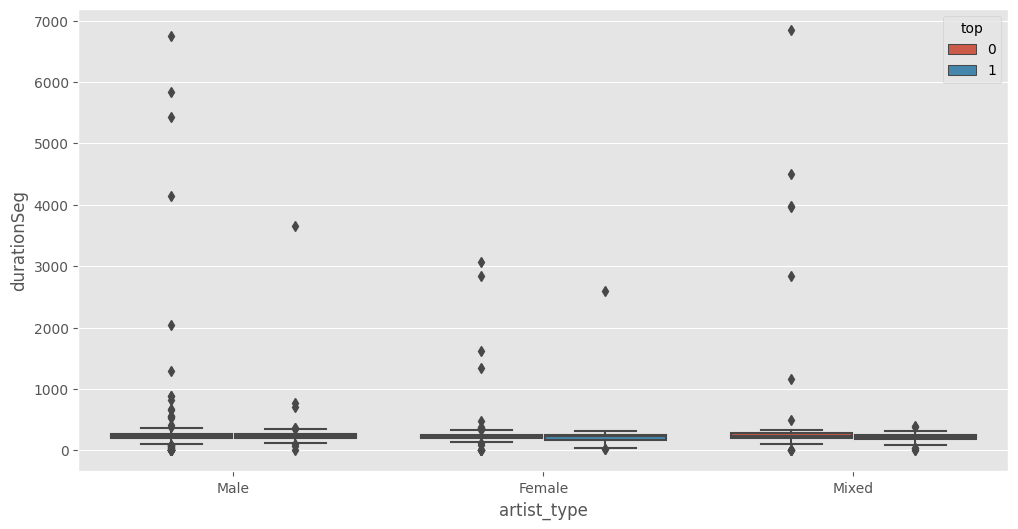

In [ ]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="artist_type",y="durationSeg", hue="top", data=artists_billboard)

In [ ]:
# Defno la función para filtrar los outliers
# clip() es el comando para recorte o limitación de valores
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))

    return(x)

# Aplico la función para hacer el tratamiento a la variable target
# función lambda sirve para que recorra todas las filas posibles
# Se esta reemplazando los outliers con los valores maximos del cuartil 0.95
artists_billboard_tratamiento = artists_billboard[['durationSeg']].apply(lambda x: outlier_capping(x))

# Muestro la variable creada con el tratamiento
artists_billboard_tratamiento.head(3)


,durationSeg
0,191.0
1,368.0
2,223.0


In [ ]:
# Unificar la nueva variable con el DF original
artists_billboard = pd.concat([artists_billboard.drop(columns=['durationSeg']), artists_billboard_tratamiento], axis=1,)

In [ ]:
artists_billboard.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0


In [ ]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,0.222047,1548.590551,227.240630
std,183.452991,2.617996e+04,0.415950,820.470454,84.984158
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,0.000000,1969.000000,200.000000
50%,317.000000,2.014051e+07,0.000000,1981.000000,232.000000
75%,475.500000,2.014101e+07,0.000000,1986.000000,266.500000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000


In [ ]:
artists_billboard['durationSeg'].quantile(np.arange(0.9,1,0.01))

0.90    321.60
0.91    328.88
0.92    340.84
0.93    355.10
0.94    367.96
0.95    399.72
0.96    401.40
0.97    401.40
0.98    401.40
0.99    401.40
Name: durationSeg, dtype: float64

<Axes: xlabel='artist_type', ylabel='durationSeg'>

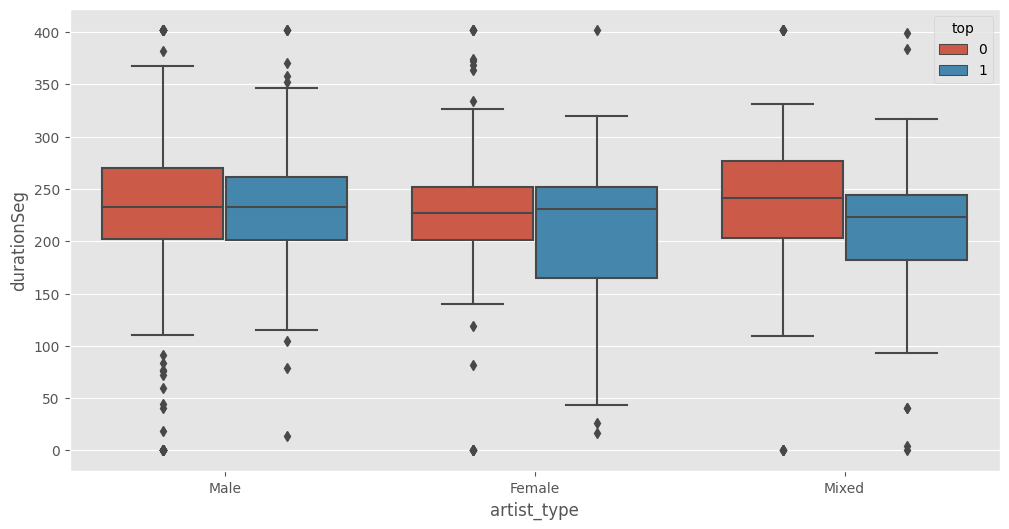

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="artist_type",y="durationSeg", hue="top", data=artists_billboard)

<Axes: xlabel='genre', ylabel='durationSeg'>

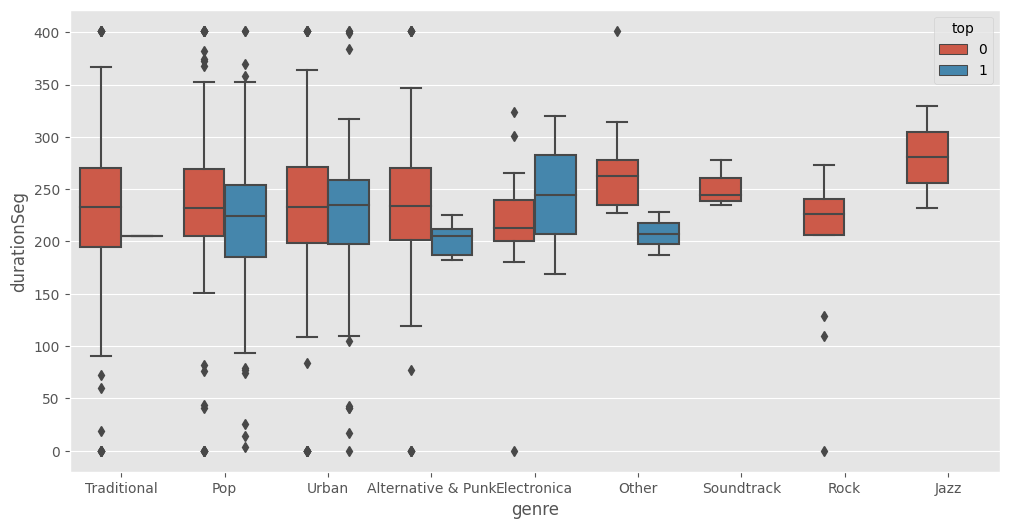

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="genre",y="durationSeg", hue="top", data=artists_billboard)

<Axes: xlabel='mood', ylabel='durationSeg'>

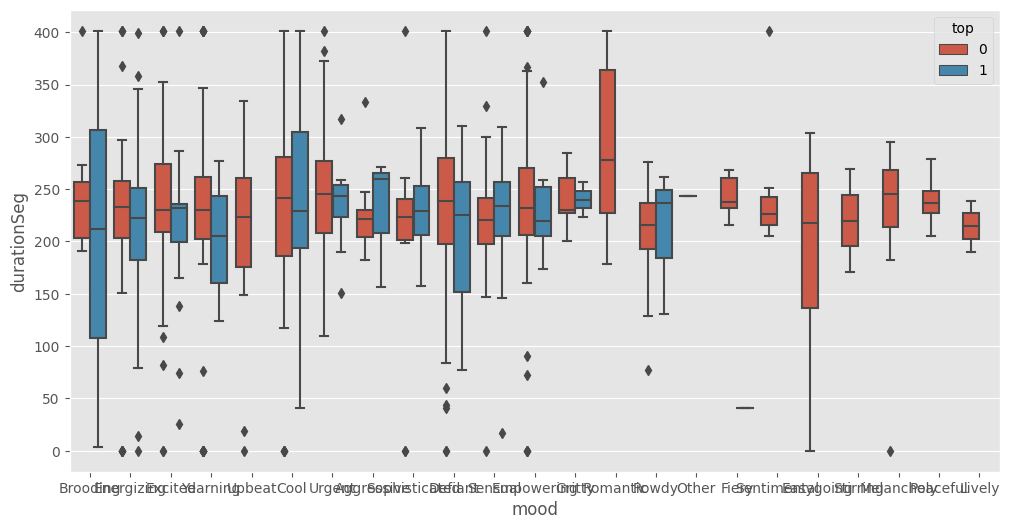

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="mood",y="durationSeg", hue="top", data=artists_billboard)

### Visualizamos los años de nacimiento de los artistas

<Axes: xlabel='anioNacimiento', ylabel='count'>

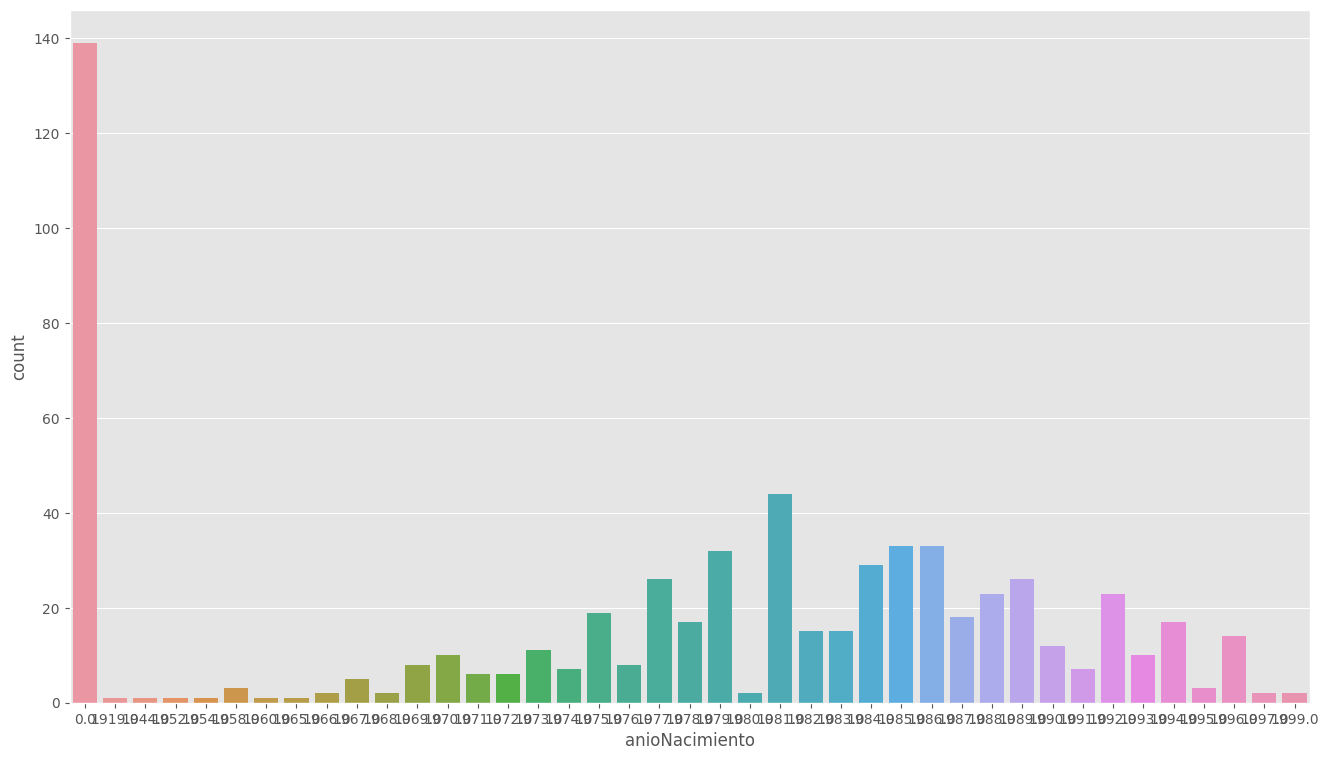

In [ ]:
#sns.countplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)
sns.countplot(data = artists_billboard, x = "anioNacimiento")

### Calculamos promedio de edad y asignamos a los registros Nulos

In [ ]:
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   top             635 non-null    int64  
 9   anioNacimiento  635 non-null    float64
 10  durationSeg     635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


In [ ]:
artists_billboard['anioNacimiento'].describe()

count     635.000000
mean     1548.590551
std       820.470454
min         0.000000
25%      1969.000000
50%      1981.000000
75%      1986.000000
max      1999.000000
Name: anioNacimiento, dtype: float64

In [ ]:
artists_billboard['anioNacimiento'].quantile(np.arange(0.8))

0.0    0.0
Name: anioNacimiento, dtype: float64

<Axes: xlabel='artist_type', ylabel='anioNacimiento'>

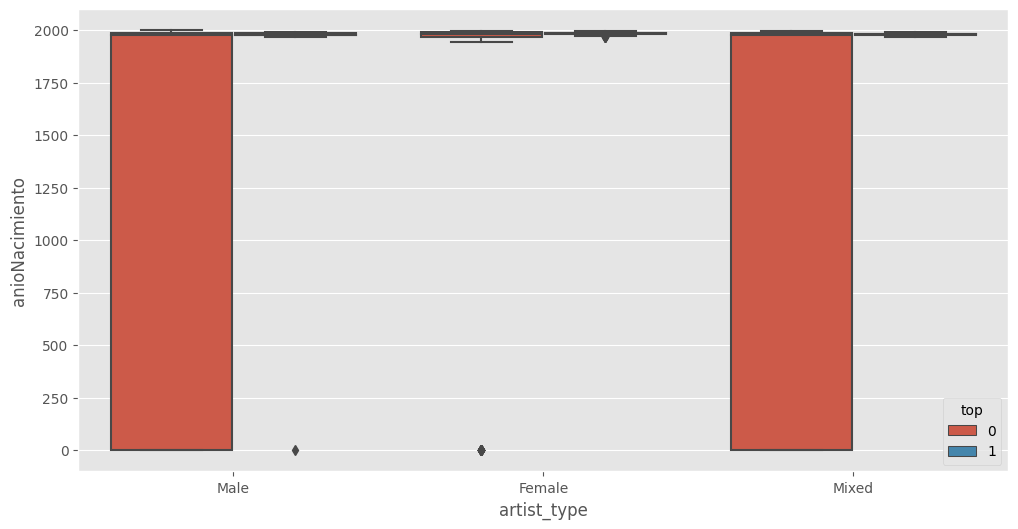

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="artist_type",y="anioNacimiento", hue="top", data=artists_billboard)

In [ ]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);

In [ ]:
artists_billboard['edad_en_billboard'].count()

496

<Axes: xlabel='edad_en_billboard', ylabel='count'>

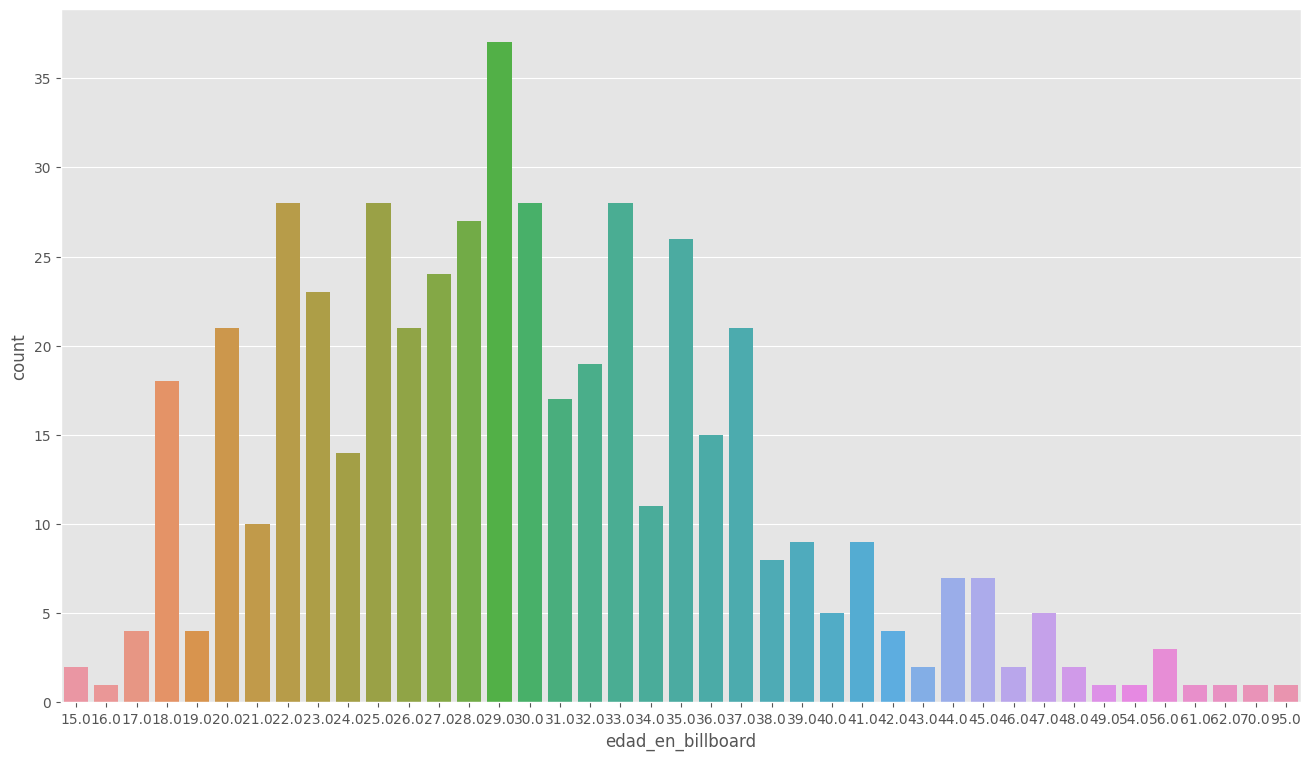

In [ ]:
sns.countplot(data = artists_billboard, x = "edad_en_billboard")

In [ ]:
artists_billboard.head(20)
# para hacer una imputación de valores para reemplazar los nulos:
# se usa el promedio cuando hay una dispersión(variación) baja de los valores

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,191.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,368.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,223.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,206.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,0.0,232.0,NaN
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,0,1990.0,219.0,24.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,1,1981.0,43.0,27.0
7,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,0,1973.0,401.4,41.0
8,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,0,1969.0,182.0,45.0
9,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,0,0.0,347.0,NaN


Teoria estadistica:

EL intervalo que hay entre el prom menos la std y el prom mas la std se concentran aprox un 65%-70%.
Este intervalo se puede definir como Intervalo de Confianza donde se puede usar para reemplazar valores nulos con valores aleatorios de ese intervalo.

In [ ]:
age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
# Cuenta la cantidad de los nulos
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()
# hacemos lista de variación / random(limt min, limit max, tamaño)
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])

artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


In [ ]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio

artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1);

<Axes: xlabel='anioNacimiento', ylabel='count'>

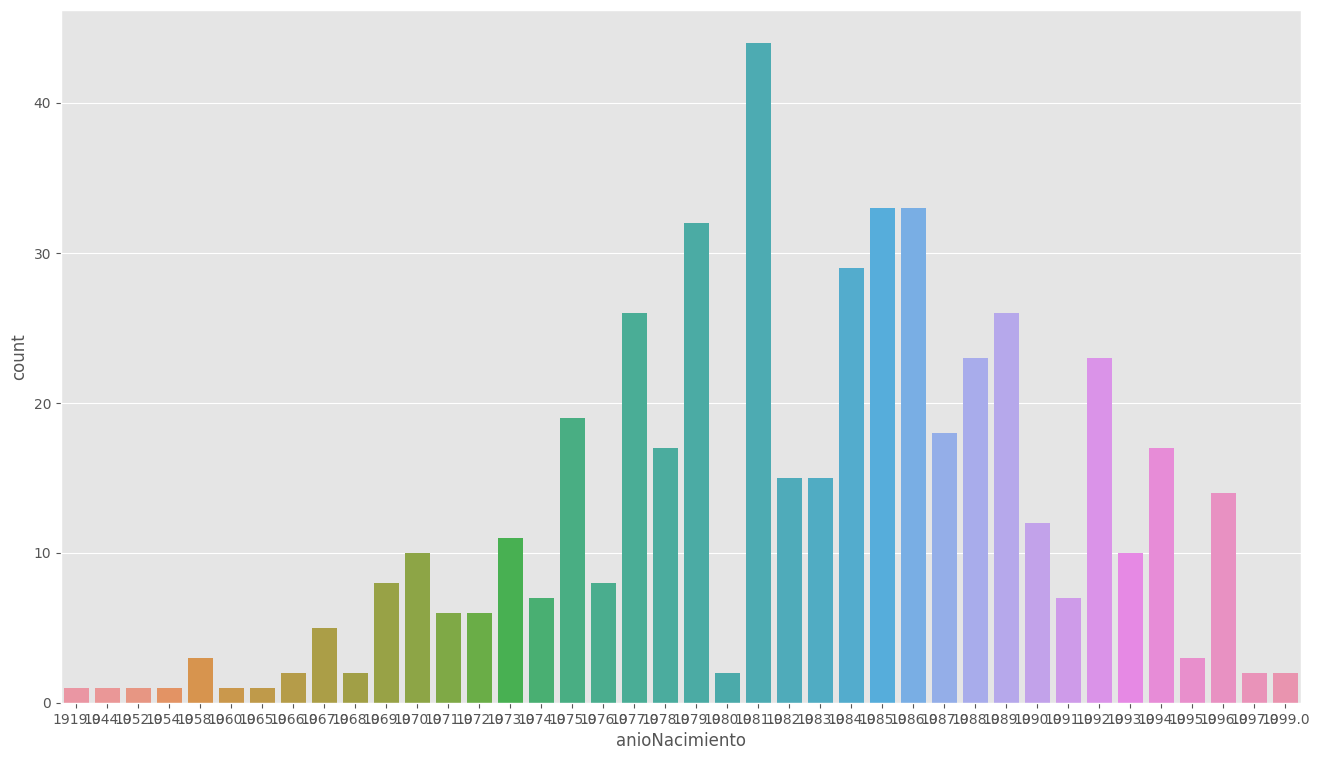

In [ ]:
#sns.factorplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)
sns.countplot(data = artists_billboard, x = "anioNacimiento")

In [ ]:
artists_billboard.describe()

,id,chart_date,top,anioNacimiento,durationSeg,edad_en_billboard
count,635.000000,6.350000e+02,635.000000,496.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,0.222047,1982.570565,227.240630,29.861417
std,183.452991,2.617996e+04,0.415950,8.346478,84.984158,7.777039
min,0.000000,2.004021e+07,0.000000,1919.000000,0.000000,15.000000
25%,158.500000,2.014010e+07,0.000000,1978.000000,200.000000,25.000000
50%,317.000000,2.014051e+07,0.000000,1984.000000,232.000000,29.000000
75%,475.500000,2.014101e+07,0.000000,1988.000000,266.500000,34.000000
max,634.000000,2.015031e+07,1.000000,1999.000000,401.400000,95.000000


<Axes: xlabel='artist_type', ylabel='edad_en_billboard'>

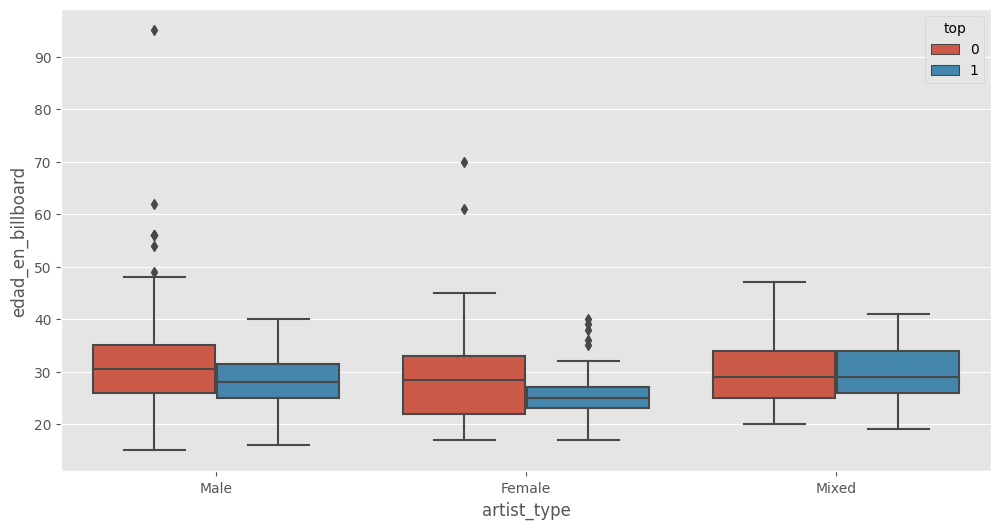

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="artist_type",y="edad_en_billboard", hue="top", data=artists_billboard)

## Visualicemos los Atributos de entrada

Tratamiento de Variables Categoricas

In [ ]:
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 635 non-null    int64  
 1   title              635 non-null    object 
 2   artist             635 non-null    object 
 3   mood               635 non-null    object 
 4   tempo              635 non-null    object 
 5   genre              635 non-null    object 
 6   artist_type        635 non-null    object 
 7   chart_date         635 non-null    int64  
 8   top                635 non-null    int64  
 9   anioNacimiento     496 non-null    float64
 10  durationSeg        635 non-null    float64
 11  edad_en_billboard  635 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 59.7+ KB


<bound method Series.sort_index of Male      387
Female    153
Mixed      95
Name: artist_type, dtype: int64>

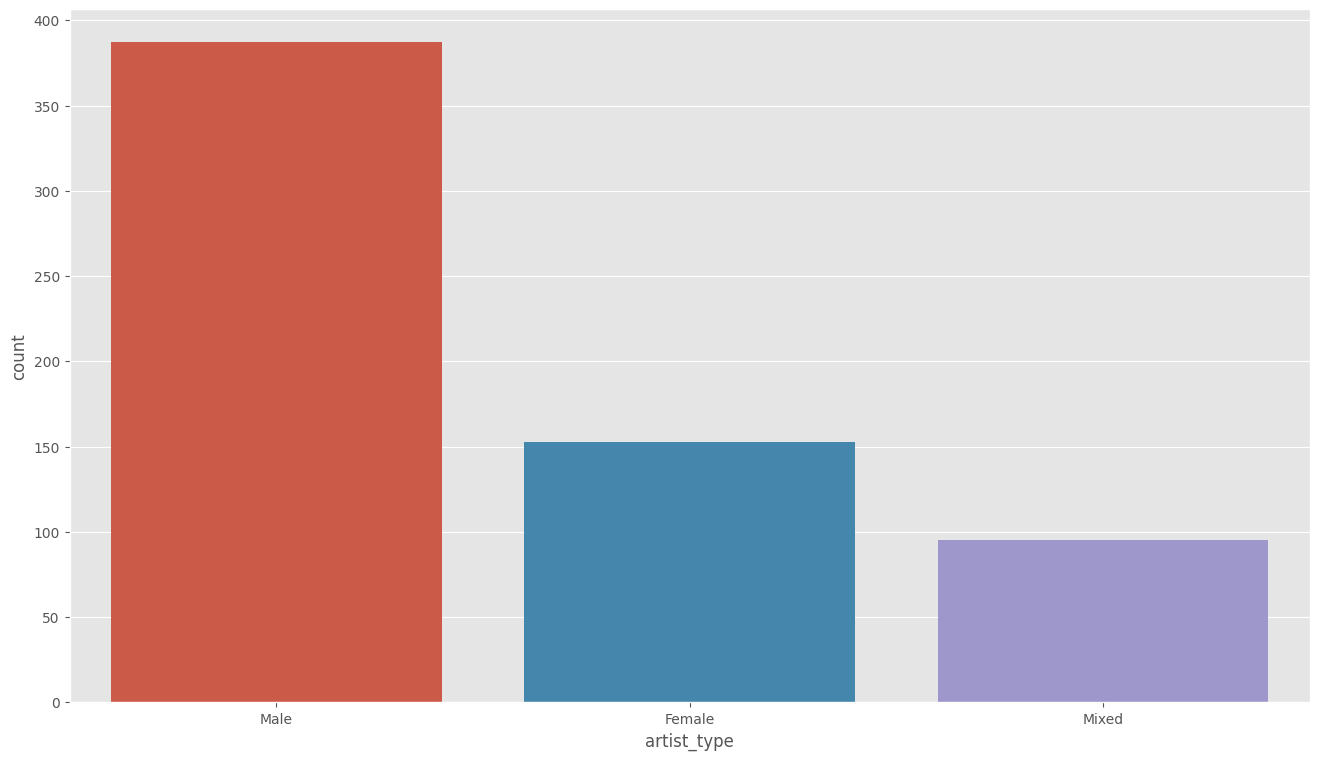

In [ ]:
#sns.factorplot('artist_type',data=artists_billboard,kind="count")
sns.countplot(data = artists_billboard, x = "artist_type")
artists_billboard['artist_type'].value_counts().sort_index

In [ ]:
# Determinar si la variable es significativa
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
# En este caso se podria discriminar Male
# También se concluye que la Male casi no tiene posibilidad de ser top
artists_billboard[['artist_type','top']].groupby(['artist_type'], as_index=False).agg(['count','sum','mean'])

top              
            count sum      mean
artist_type                    
Female        153  49  0.320261
Male          387  63  0.162791
Mixed          95  29  0.305263

<bound method Series.sort_index of Empowering       88
Cool             78
Energizing       71
Yearning         68
Defiant          64
Excited          62
Sensual          55
Urgent           30
Rowdy            15
Sophisticated    15
Brooding         14
Upbeat           12
Aggressive       11
Melancholy       10
Gritty            9
Romantic          7
Sentimental       7
Fiery             6
Easygoing         4
Peaceful          4
Stirring          2
Lively            2
Other             1
Name: mood, dtype: int64>

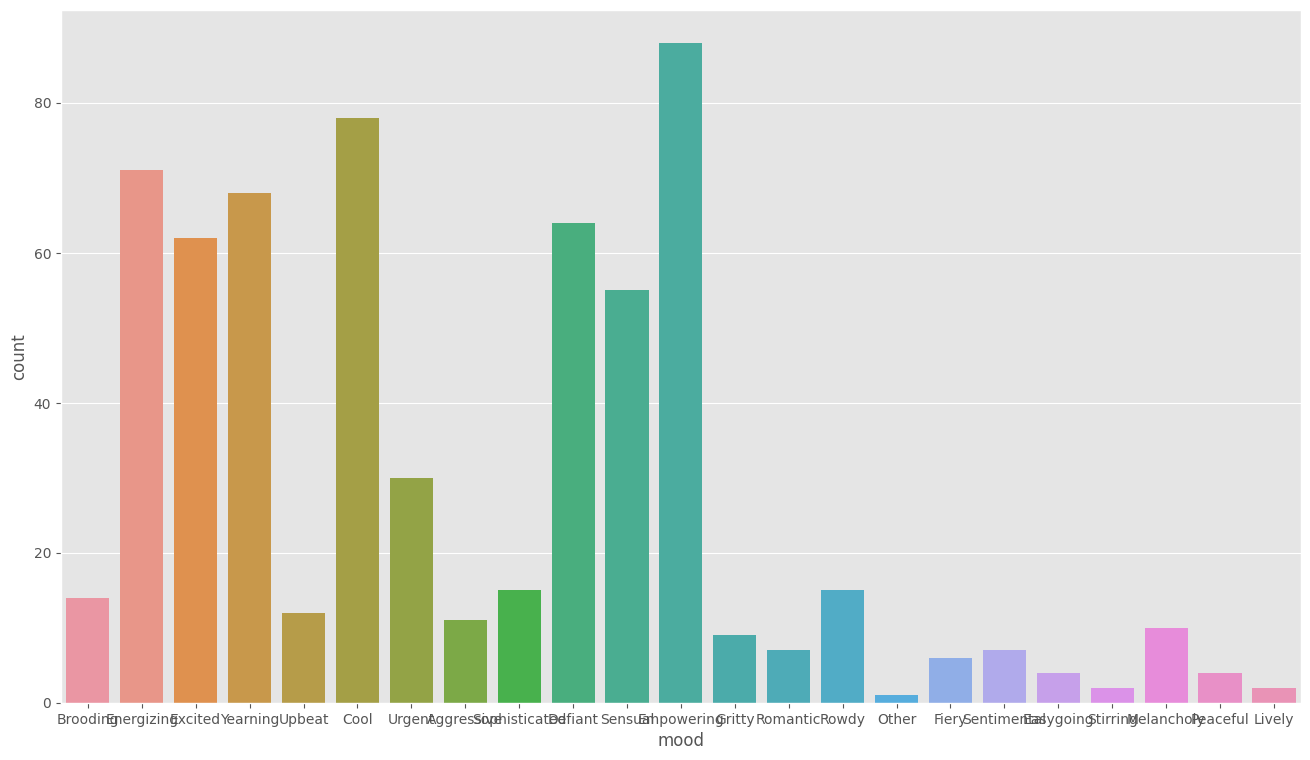

In [ ]:
#sns.factorplot('mood',data=artists_billboard,kind="count", aspect=3)
# Esta variable es multidimensional
sns.countplot(data = artists_billboard, x = "mood")
artists_billboard['mood'].value_counts().sort_index

In [ ]:
artists_billboard[['mood','top']].groupby(['mood'], as_index=False).agg(['count','sum','mean'])
#artists_billboard[['artist_type','top']].groupby(['artist_type'], as_index=False).agg(['count','sum','mean'])

top              
              count sum      mean
mood                             
Aggressive       11   3  0.272727
Brooding         14   3  0.214286
Cool             78  27  0.346154
Defiant          64   5  0.078125
Easygoing         4   0  0.000000
Empowering       88  10  0.113636
Energizing       71  33  0.464789
Excited          62  19  0.306452
Fiery             6   1  0.166667
Gritty            9   2  0.222222
Lively            2   0  0.000000
Melancholy       10   0  0.000000
Other             1   0  0.000000
Peaceful          4   0  0.000000
Romantic          7   0  0.000000
Rowdy            15   3  0.200000
Sensual          55  17  0.309091
Sentimental       7   0  0.000000
Sophisticated    15   4  0.266667
Stirring          2   0  0.000000
Upbeat           12   0  0.000000
Urgent           30   8  0.266667
Yearning         68   6  0.088235

<bound method Series.sort_index of Medium Tempo    517
Slow Tempo       65
Fast Tempo       53
Name: tempo, dtype: int64>

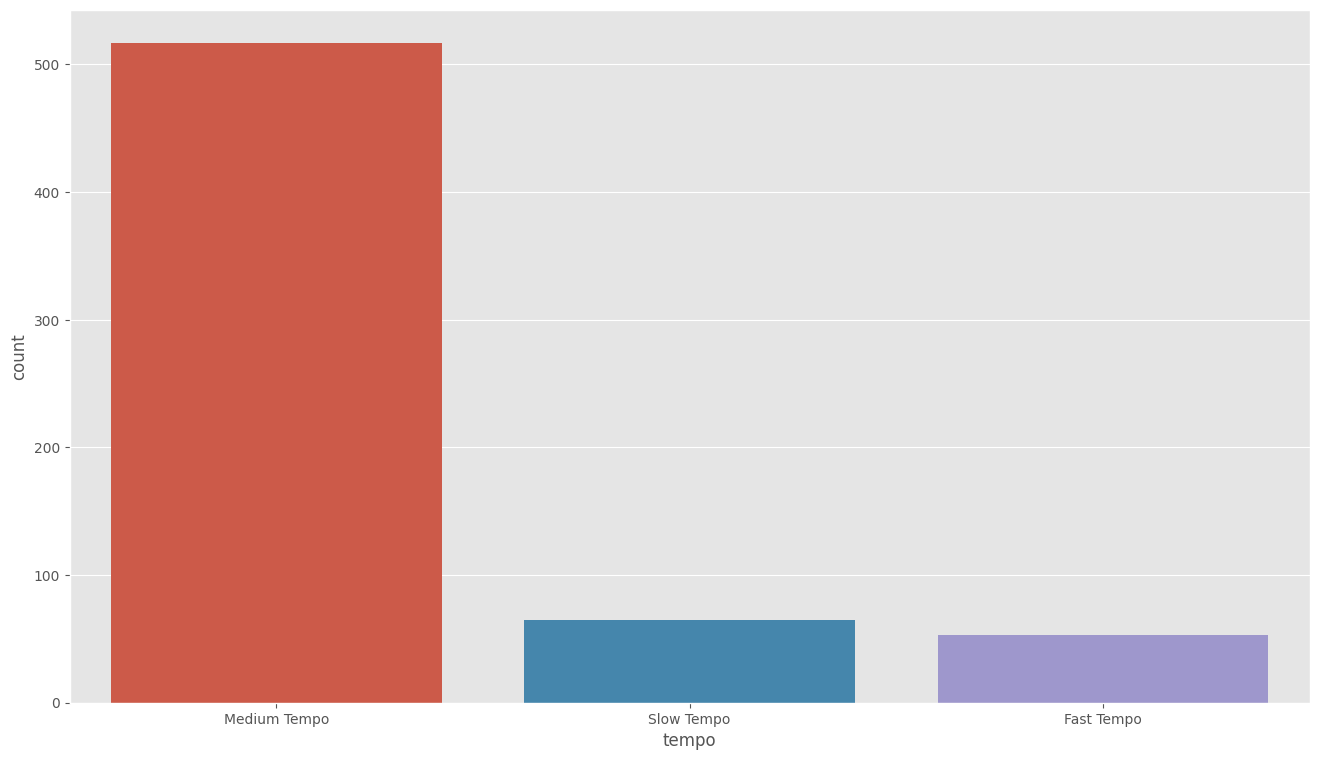

In [ ]:
sns.countplot(data = artists_billboard, x = "tempo")
artists_billboard['tempo'].value_counts().sort_index

In [ ]:
artists_billboard[['tempo','top']].groupby(['tempo'], as_index=False).agg(['count','sum','mean'])

top               
             count  sum      mean
tempo                            
Fast Tempo      53   12  0.226415
Medium Tempo   517  113  0.218569
Slow Tempo      65   16  0.246154

<bound method Series.sort_index of Urban                 215
Pop                   188
Traditional           113
Alternative & Punk     60
Electronica            27
Rock                   13
Other                  12
Soundtrack              5
Jazz                    2
Name: genre, dtype: int64>

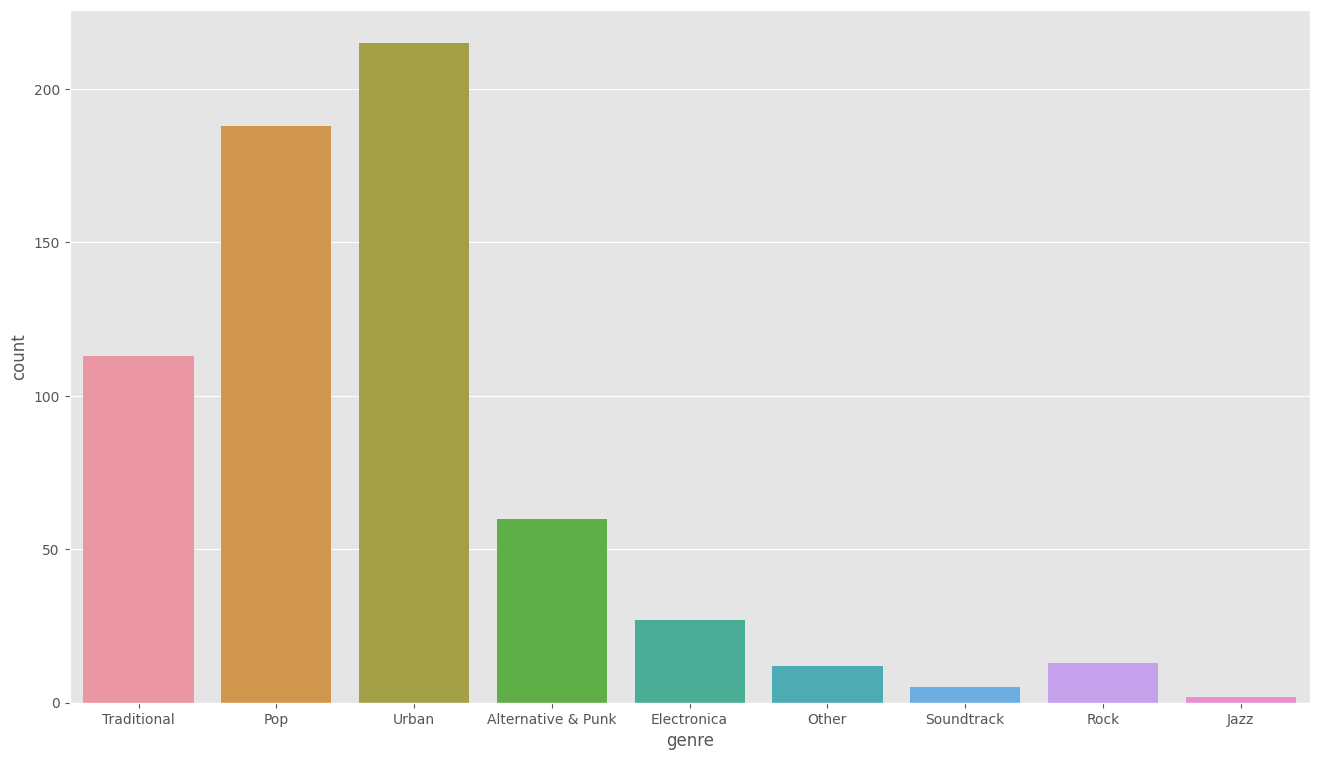

In [ ]:
sns.countplot(data = artists_billboard, x = "genre")
artists_billboard['genre'].value_counts().sort_index

In [ ]:
artists_billboard[['genre','top']].groupby(['genre'], as_index=False).agg(['count','sum','mean'])

top              
                   count sum      mean
genre                                 
Alternative & Punk    60   5  0.083333
Electronica           27   2  0.074074
Jazz                   2   0  0.000000
Other                 12   2  0.166667
Pop                  188  60  0.319149
Rock                  13   0  0.000000
Soundtrack             5   0  0.000000
Traditional          113   1  0.008850
Urban                215  71  0.330233

In [ ]:
# Mood Mapping
# Variable Categorica pasarla a númerica con relacione entre las categorias de la variable
# Se aconseja hacer este proceso con la empresa para ver una mejor relación entre las categorias
artists_billboard['moodEncoded'] = artists_billboard['mood'].map( {'Energizing': 6,
                                        'Empowering': 6,
                                        'Cool': 5,
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3,
                                        'Sensual': 2,
                                        'Gritty': 3, #coraje
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3,
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4,
                                        'Romantic': 2,
                                        'Peaceful': 1,
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)

In [ ]:
# Tempo Mapping
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)

In [ ]:
# Genre Mapping
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( {'Urban': 4,
                                          'Pop': 3,
                                          'Traditional': 2,
                                          'Alternative & Punk': 1,
                                         'Electronica': 1,
                                          'Rock': 1,
                                          'Soundtrack': 0,
                                          'Jazz': 0,
                                          'Other':0,'':0}
                                       ).astype(int)

In [ ]:
# artist_type Mapping
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)

In [ ]:
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  635 non-null    int64  
 1   title               635 non-null    object 
 2   artist              635 non-null    object 
 3   mood                635 non-null    object 
 4   tempo               635 non-null    object 
 5   genre               635 non-null    object 
 6   artist_type         635 non-null    object 
 7   chart_date          635 non-null    int64  
 8   top                 635 non-null    int64  
 9   anioNacimiento      496 non-null    float64
 10  durationSeg         635 non-null    float64
 11  edad_en_billboard   635 non-null    int64  
 12  moodEncoded         635 non-null    int64  
 13  tempoEncoded        635 non-null    int64  
 14  genreEncoded        635 non-null    int64  
 15  artist_typeEncoded  635 non-null    int64  
dtypes: float

In [ ]:
# Mapping edad en la que llegaron al billboard
# Las variables que son numericamente originales
# también hacer una agrupación categorica númerica
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4

In [ ]:
# Mapping Song Duration
artists_billboard.loc[ artists_billboard['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[ artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

In [ ]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = artists_billboard.drop(drop_elements, axis = 1)

In [ ]:
artists_encoded.head(3)

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0


### Analizamos nuestros datos de Entrada Categóricos

In [ ]:
artists_encoded.head(10)

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,0.0,3.0
5,0,5,2,2,3,1.0,3.0
6,1,5,1,4,2,2.0,0.0
7,0,3,0,3,3,4.0,6.0
8,0,4,2,4,2,4.0,2.0
9,0,4,2,1,3,3.0,6.0


In [ ]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,2.029921,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.155450,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,4.000000,6.000000


In [ ]:
artists_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   top                 635 non-null    int64  
 1   moodEncoded         635 non-null    int64  
 2   tempoEncoded        635 non-null    int64  
 3   genreEncoded        635 non-null    int64  
 4   artist_typeEncoded  635 non-null    int64  
 5   edadEncoded         635 non-null    float64
 6   durationEncoded     635 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 34.9 KB


<Axes: title={'center': 'Pearson Correlation of Features'}>

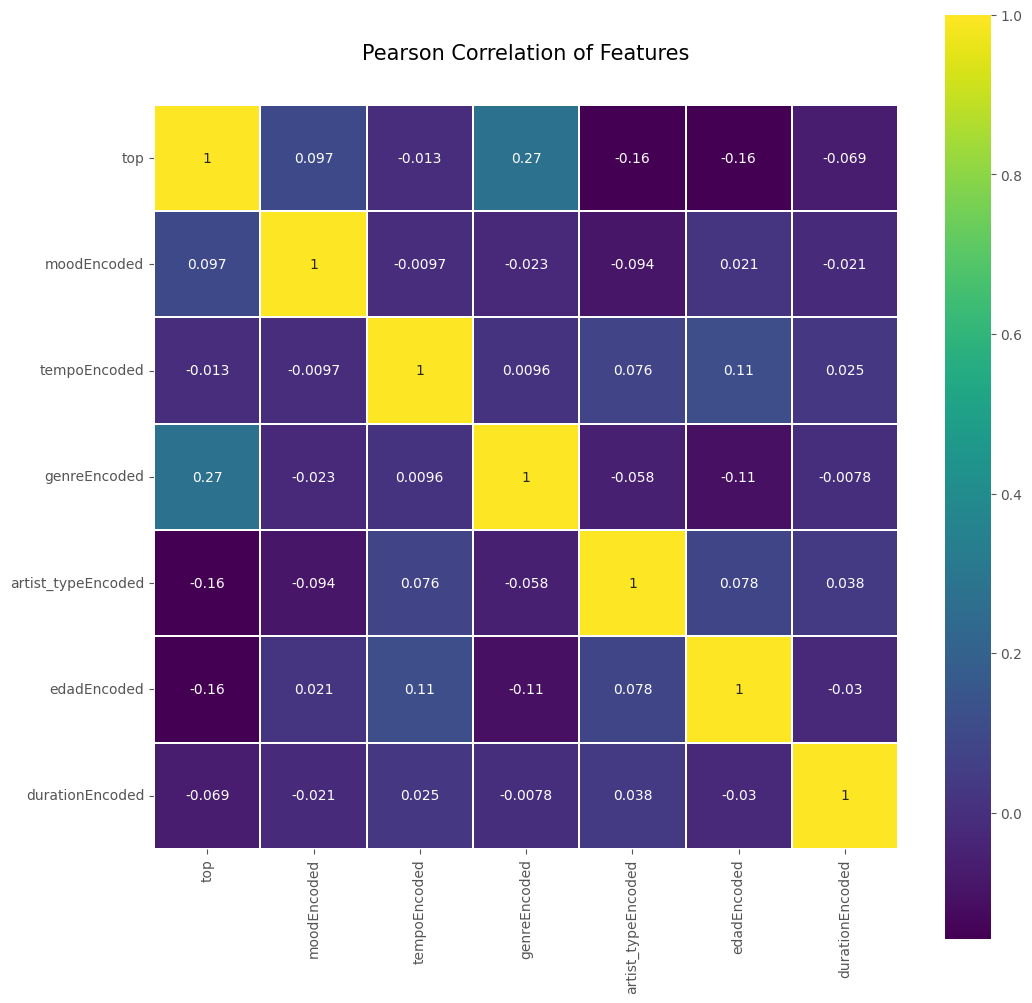

In [ ]:
# Correlación de Pearson
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(artists_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
#No se Puede Aplicar con nulos en los datos
from sklearn.feature_selection import SelectKBest

In [ ]:
# Saca los k=# más relevantes
X=artists_encoded.drop(['top'], axis=1)
y=artists_encoded['top']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['genreEncoded', 'artist_typeEncoded', 'edadEncoded'], dtype='object')


In [ ]:
artists_encoded[['genreEncoded', 'top']].groupby(['genreEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                  mean count sum
genreEncoded                    
0             0.105263    19   2
1             0.070000   100   7
2             0.008850   113   1
3             0.319149   188  60
4             0.330233   215  71

In [ ]:
artists_encoded[['artist_typeEncoded', 'top']].groupby(['artist_typeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                        mean count sum
artist_typeEncoded                    
1                   0.305263    95  29
2                   0.320261   153  49
3                   0.162791   387  63

In [ ]:
artists_encoded[['edadEncoded', 'top']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
edadEncoded                    
0.0          0.246575    73  18
1.0          0.324324   148  48
2.0          0.250000   148  37
3.0          0.164384   219  36
4.0          0.042553    47   2

In [ ]:
artists_encoded[['tempoEncoded', 'top']].groupby(['tempoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top           
                  mean count  sum
tempoEncoded                     
0             0.226415    53   12
1             0.246154    65   16
2             0.218569   517  113

In [ ]:
artists_encoded[['durationEncoded', 'top']].groupby(['durationEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                     mean count sum
durationEncoded                    
0.0              0.295775    71  21
1.0              0.333333    30  10
2.0              0.212963   108  23
3.0              0.202381   168  34
4.0              0.232143   112  26
5.0              0.145455    55   8
6.0              0.208791    91  19

In [ ]:
artists_encoded[['edadEncoded', 'top']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
edadEncoded                    
0.0          0.246575    73  18
1.0          0.324324   148  48
2.0          0.250000   148  37
3.0          0.164384   219  36
4.0          0.042553    47   2

### Otra metodología de imputación de datos

In [ ]:
artists_billboard=pd.read_csv('artists_billboard_fix3.csv',sep = ",",encoding = 'latin1')

In [ ]:
artists_billboard.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0


<Axes: xlabel='anioNacimiento', ylabel='count'>

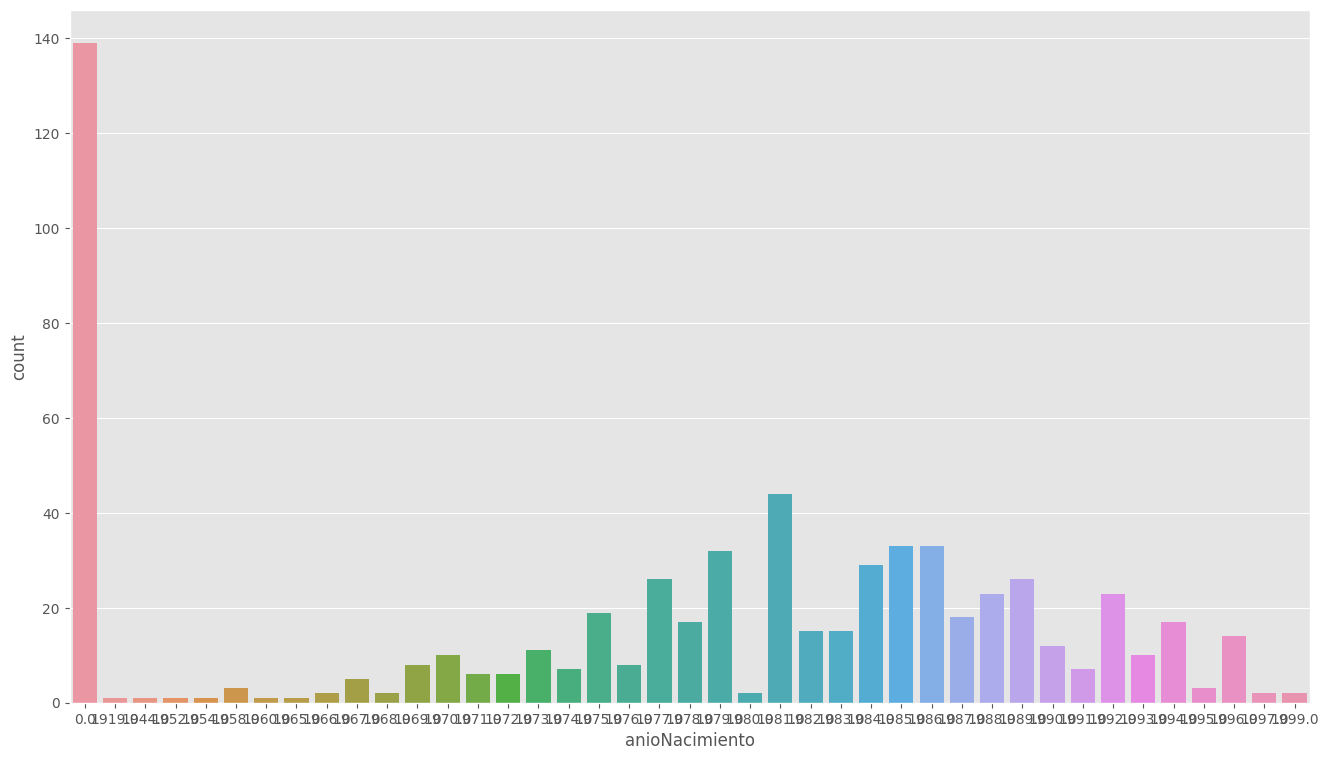

In [ ]:
#sns.factorplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)
sns.countplot(data = artists_billboard, x = "anioNacimiento")


In [ ]:
# Calculo la mediana
artists_billboard['anioNacimiento'].fillna(artists_billboard['anioNacimiento'].median(), inplace=True)

In [ ]:
median_artists_billboard = artists_billboard['anioNacimiento'].median(skipna=True)

In [ ]:
print (median_artists_billboard)

1981.0


In [ ]:
artists_billboard=artists_billboard.replace(0,median_artists_billboard)

<Axes: xlabel='anioNacimiento', ylabel='count'>

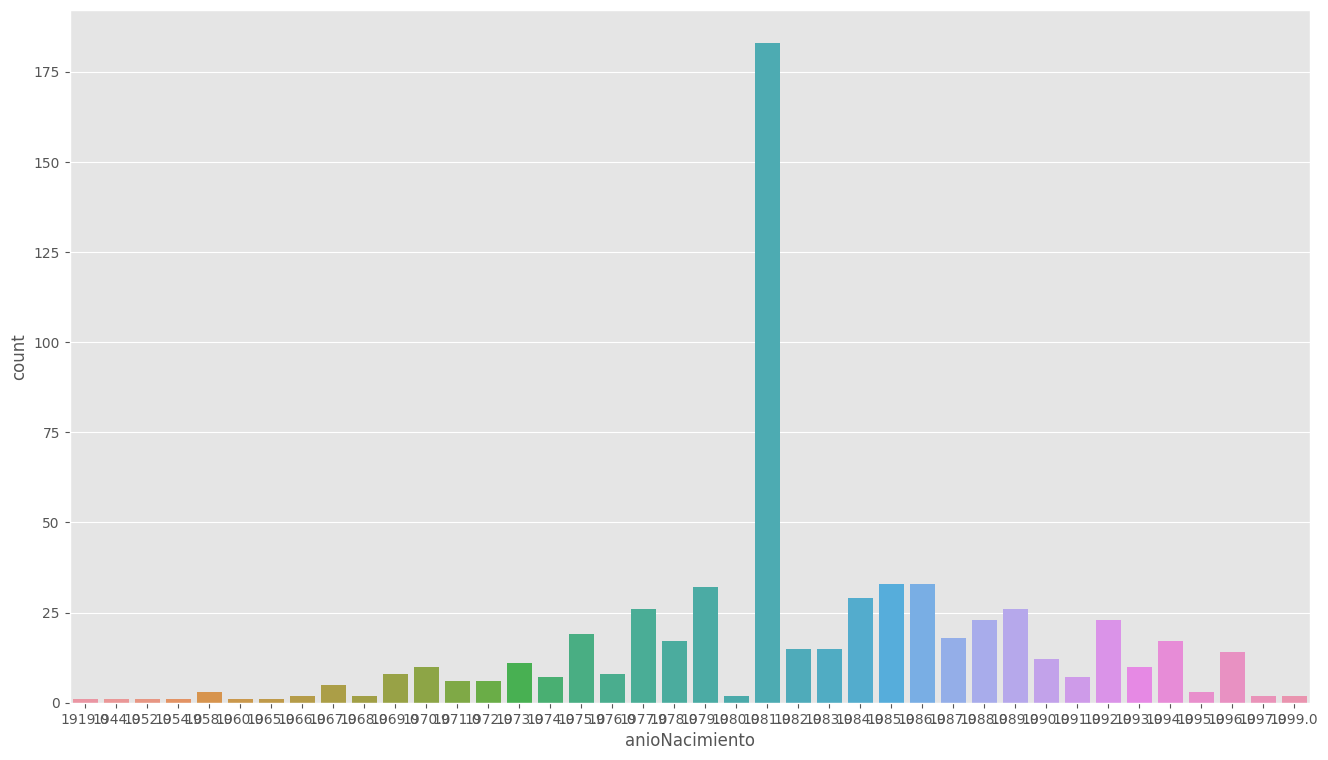

In [ ]:
#sns.factorplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)
sns.countplot(data = artists_billboard, x = "anioNacimiento")